# Code by [Avishake Adhikary](https://www.linkedin.com/in/avishakeadhikary/)

#### Amity University Kolkata
>Under the guidance of [**Prof. Indranil Seal**](https://github.com/Indranil-Seal/)

# Machine Learning Lifecycle

1. Data Sanity Check 
2. Exploratory Data Analysis (EDA)
3. Additional Insights
4. Feature Engineering
5. Baseline Model Creation
6. Optimizing Baseline Model

# Install Dependencies

In [1]:
!pip install numpy pandas sklearn matplotlib seaborn

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn as skl
from matplotlib import pyplot as plt
import seaborn as sns

# Import Dataset

In [3]:
data = pd.read_csv('ElectricCarData_Clean.csv')
data

Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
..           ...                              ...       ...           ...   
98       Nissan                       Ariya 63kWh       7.5           160   
99         Audi     e-tron S Sportback 55 quattro       4.5           210   
100      Nissan               Ariya e-4ORCE 63kWh       5.9           200   
101      Nissan   Ariya e-4ORCE 87kWh Performance       5.1           200   
102       Byton                 M-Byte 95 kWh 2WD       7.5           190   

     Range_Km  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0         450              161            940         Yes        AWD   
1         270              167            250         Yes        RWD   
2         400              181            620         Yes        AWD   
3         360              206            560         Yes        RWD   
4         170              168            190         Yes        RWD   
..        ...              ...            ...         ...        ...   
98        330              191            440         Yes        FWD   
99        335              258            540         Yes        AWD   
100       325              194            440         Yes        AWD   
101       375              232            450         Yes        AWD   
102       400              238            480         Yes        AWD   

       PlugType  BodyStyle Segment  Seats  PriceEuro  
0    Type 2 CCS      Sedan       D      5      55480  
1    Type 2 CCS  Hatchback       C      5      30000  
2    Type 2 CCS   Liftback       D      5      56440  
3    Type 2 CCS        SUV       D      5      68040  
4    Type 2 CCS  Hatchback       B      4      32997  
..          ...        ...     ...    ...        ...  
98   Type 2 CCS  Hatchback       C      5      45000  
99   Type 2 CCS        SUV       E      5      96050  
100  Type 2 CCS  Hatchback       C      5      50000  
101  Type 2 CCS  Hatchback       C      5      65000  
102  Type 2 CCS        SUV       E      5      62000  

[103 rows x 14 columns]

# Create Top View Dataset

#### We want to create a top view of the dataset to understand the data properly in order to further process data
So we will be creating a new view with the attributes => 
>||ColumnName|NoOfUniqueValues|DataType|NoOfMissingValues|IsPrimary Key||

In [4]:
col_list = list(data.columns) #Creates the list of all the Columns
topview_data = pd.DataFrame() #Creates new pandas DataFrame

for col in col_list:
    datum = pd.DataFrame({'colname':col, #each column extracted from the for loop
                          '#uniq_':[len(data[col].unique())], #lists unique values number of unique values to specified columns
                          'dtype':[data[col].dtype], #datatype used for column
                          '#missing_':[data[col].isna().sum()], #lists out all the columns which are NA values
                          'is_PKey':[len(data[col].unique()) == data.shape[0]]}) #data.shape returns the dimensions of data each time
                          #checks if the numberofuniquevalues is equal to the numberofrows each time (if true then primarykey)
    topview_data = pd.concat([topview_data,datum],axis = 0) #concatinates the datatuple created each time to finaltopview
    #axis 0 states horizontal/rows axis 1 states vertical/columns
    
topview_data #Prints TopView Data

colname  #uniq_    dtype  #missing_  is_PKey
0            Brand      33   object          0    False
0            Model     102   object          0    False
0         AccelSec      55  float64          0    False
0     TopSpeed_KmH      25    int64          0    False
0         Range_Km      50    int64          0    False
0  Efficiency_WhKm      54    int64          0    False
0   FastCharge_KmH      51   object          0    False
0      RapidCharge       2   object          0    False
0       PowerTrain       3   object          0    False
0         PlugType       4   object          0    False
0        BodyStyle       9   object          0    False
0          Segment       8   object          0    False
0            Seats       5    int64          0    False
0        PriceEuro      87    int64          0    False

# Truely Validate Data

#### We see that there are no mission values and each attribute is individually a primary key
>So to overcome the problem we combine the Brand and Model attributes to a single Brand+Model attribute and create a superior primary key
>And we also manually check for the missing values to deal with them

In [5]:
#creates a new attribute combining brand&model for primary key
data['brand_model_key'] = data['Brand'].astype(str) + data['Model'].astype(str)
#checks number of unique attributes, the number of data and if those attributes are the same as shape
print(len(data['brand_model_key'].unique()), data.shape[0] , len(data['brand_model_key'].unique()) == data.shape[0])
#print dataset
data

"""
BM_array = data[['Brand','Model']].drop_duplicates()
BM_array.shape,data[['Brand','Model']].shape
"""

102 103 False


"\nBM_array = data[['Brand','Model']].drop_duplicates()\nBM_array.shape,data[['Brand','Model']].shape\n"

#### We see that the data shapes don't match because numberofuniquevalues > numberofvalues in the attribute we used to create a primary key
> So to overcome this we drop the duplicates from the dataset

In [6]:
#Prints the columns Brand,Model,FastCharge_KmH based on FastCharge_KmH columns where its value is '-'
data.loc[data['FastCharge_KmH'] == '-',['Brand','Model','FastCharge_KmH']]

Brand              Model FastCharge_KmH
57  Renault           Twingo ZE              -
68  Renault   Kangoo Maxi ZE 33              -
77    Smart         EQ forfour               -
82    Smart     EQ fortwo coupe              -
91    Smart    EQ fortwo cabrio              -

#### We see that the missing values are still there in the dataset so we need to deal with them
> In order to preserve the attributes connected to the missing values we replace the non readable values with a 0 value

In [7]:
#Replaces '-' values in FastCharge_KmH with '0' value
data['FastCharge_KmH'] = data['FastCharge_KmH'].replace('-',0)
#prints data in boolean form
print(data['FastCharge_KmH'] == '-')

0      False
1      False
2      False
3      False
4      False
       ...  
98     False
99     False
100    False
101    False
102    False
Name: FastCharge_KmH, Length: 103, dtype: bool


# Exploratory Data Analysis
![EDA Cheat Sheet](https://miro.medium.com/max/1000/0*l0P7bwhVkLp1SPbS.png)
- Feature: AccelSec > Accleration Seconds

In [8]:
data.AccelSec.describe() #Gives necessary information based on AccelSec attribute in the dataset

count    103.000000
mean       7.396117
std        3.017430
min        2.100000
25%        5.100000
50%        7.300000
75%        9.000000
max       22.400000
Name: AccelSec, dtype: float64

In [9]:
#We group the data by brand because that seems to be the correct option to classify the data and then we run aggregate functions
#on the data which returns either a dataframe or a series object
brandaccelgrp = data.groupby('Brand').agg(avg_AccelSec = pd.NamedAgg('AccelSec','median'),#calls median function on AccelSec
                                          min_AccelSec = pd.NamedAgg('AccelSec','min'),#calls minimum function on AccelSec
                                          max_AccelSec = pd.NamedAgg('AccelSec','max'),#calls maximum function on AccelSec
#calls count functin on Model then resets its index and sorts values of the data according to avg_AccelSec in ascending order
                                          models = pd.NamedAgg('Model','count')).reset_index().sort_values('avg_AccelSec',ascending = True)
brandaccelgrp #Prints the new dataframe

Brand  avg_AccelSec  min_AccelSec  max_AccelSec  models
15       Lucid           2.80           2.8           2.8       1
24     Porsche           3.50           2.8           4.0       5
30       Tesla           3.80           2.1           7.0      13
23    Polestar           4.70           4.7           4.7       1
11      Jaguar           4.80           4.8           4.8       1
32       Volvo           4.90           4.9           4.9       1
18    Mercedes           5.10           5.0          10.0       3
1         Audi           5.70           3.5           6.8       9
8         Ford           6.30           6.0           7.0       4
4        CUPRA           6.50           6.5           6.5       1
2          BMW           6.85           4.0           7.3       4
19        Mini           7.30           7.3           7.3       1
20      Nissan           7.40           5.1          14.0       8
3        Byton           7.50           5.5           7.5       3
13       Lexus           7.50           7.5           7.5       1
12         Kia           7.90           7.8           9.9       5
21        Opel           8.10           7.3           8.5       3
16          MG           8.20           8.2           8.2       1
22     Peugeot           8.30           8.1           8.5       2
31  Volkswagen           8.45           7.3          11.9       8
6           DS           8.70           8.7           8.7       1
9        Honda           8.90           8.3           9.5       2
27       Skoda           8.90           6.2          12.3       6
7         Fiat           9.00           9.0           9.0       2
29        Sono           9.00           9.0           9.0       1
17       Mazda           9.00           9.0           9.0       1
0       Aiways           9.00           9.0           9.0       1
10     Hyundai           9.70           7.9           9.9       3
5      Citroen           9.70           9.7           9.7       1
14   Lightyear          10.00          10.0          10.0       1
25     Renault          11.40           9.5          22.4       5
28       Smart          11.90          11.6          12.7       3
26        SEAT          12.30          12.3          12.3       1

- Feature: TopSpeed_KmH > Top Speed in kmph

In [10]:
data.TopSpeed_KmH.describe() #Gives necessary information based on TopSpeed_KmH attribute in the dataset

count    103.000000
mean     179.194175
std       43.573030
min      123.000000
25%      150.000000
50%      160.000000
75%      200.000000
max      410.000000
Name: TopSpeed_KmH, dtype: float64

In [11]:
#We group the data by brand because that seems to be the correct option to classify the data and then we run aggregate functions
#on the data which returns either a dataframe or a series object
data.groupby('Brand').agg(avg_TopSpeed_KmH = pd.NamedAgg('TopSpeed_KmH','mean'),#calls mean function on TopSpeed_KmH
                          min_TopSpeed_KmH = pd.NamedAgg('TopSpeed_KmH','min'),#calls min function on TopSpeed_KmH
                          max_TopSpeed_KmH = pd.NamedAgg('TopSpeed_KmH','max'),#calls max function on TopSpeed_KmH
#calls count functin on Model then resets its index and sorts values of the data according to avg_TopSpeed_KmH in descending order
                          models = pd.NamedAgg('Model','count')).reset_index().sort_values('avg_TopSpeed_KmH',ascending = False)

Brand  avg_TopSpeed_KmH  min_TopSpeed_KmH  max_TopSpeed_KmH  models
24     Porsche         254.000000               250               260       5
15       Lucid         250.000000               250               250       1
30       Tesla         244.461538               180               410      13
23    Polestar         210.000000               210               210       1
1         Audi         200.000000               180               240       9
11      Jaguar         200.000000               200               200       1
3        Byton         190.000000               190               190       3
32       Volvo         180.000000               180               180       1
8         Ford         180.000000               180               180       4
18    Mercedes         173.333333               140               200       3
2          BMW         172.500000               150               200       4
20      Nissan         168.000000               123               200       8
12         Kia         162.600000               155               167       5
10     Hyundai         162.333333               155               167       3
13       Lexus         160.000000               160               160       1
4        CUPRA         160.000000               160               160       1
27       Skoda         158.333333               130               180       6
31  Volkswagen         155.000000               130               160       8
22     Peugeot         150.000000               150               150       2
21        Opel         150.000000               150               150       3
0       Aiways         150.000000               150               150       1
19        Mini         150.000000               150               150       1
17       Mazda         150.000000               150               150       1
14   Lightyear         150.000000               150               150       1
7         Fiat         150.000000               150               150       2
6           DS         150.000000               150               150       1
5      Citroen         150.000000               150               150       1
9        Honda         145.000000               145               145       2
29        Sono         140.000000               140               140       1
16          MG         140.000000               140               140       1
25     Renault         135.000000               130               140       5
26        SEAT         130.000000               130               130       1
28       Smart         130.000000               130               130       3

- Feature: Range_Km > Mileage

In [12]:
data.Range_Km.describe() #Gives necessary information based on Range_Km attribute in the dataset

count    103.000000
mean     338.786408
std      126.014444
min       95.000000
25%      250.000000
50%      340.000000
75%      400.000000
max      970.000000
Name: Range_Km, dtype: float64

In [13]:
#We group the data by brand because that seems to be the correct option to classify the data and then we run aggregate functions
#on the data which returns either a dataframe or a series object
data.groupby('Brand').agg(avg_Range_Km = pd.NamedAgg('Range_Km','mean'),#calls mean function on Range_Km
                          min_Range_Km = pd.NamedAgg('Range_Km','min'),#calls min function on Range_Km
                          max_Range_Km = pd.NamedAgg('Range_Km','max'),#calls max function on Range_Km
#calls count functin on Model then resets its index and sorts values of the data according to avg_Range_Km in descending order
                          models = pd.NamedAgg('Model','count')).reset_index().sort_values('avg_Range_Km',ascending = False)

Brand  avg_Range_Km  min_Range_Km  max_Range_Km  models
15       Lucid     610.000000           610           610       1
14   Lightyear     575.000000           575           575       1
30       Tesla     500.769231           310           970      13
4        CUPRA     425.000000           425           425       1
23    Polestar     400.000000           400           400       1
8         Ford     395.000000           340           450       4
24     Porsche     388.000000           365           425       5
32       Volvo     375.000000           375           375       1
3        Byton     371.666667           325           400       3
11      Jaguar     365.000000           365           365       1
1         Audi     356.666667           280           425       9
18    Mercedes     350.000000           330           370       3
27       Skoda     337.500000           195           420       6
0       Aiways     335.000000           335           335       1
20      Nissan     328.125000           190           440       8
2          BMW     318.750000           230           450       4
31  Volkswagen     318.125000           190           440       8
12         Kia     313.000000           230           370       5
10     Hyundai     301.666667           250           400       3
21        Opel     288.333333           255           335       3
13       Lexus     270.000000           270           270       1
22     Peugeot     262.500000           250           275       2
6           DS     250.000000           250           250       1
5      Citroen     250.000000           250           250       1
7         Fiat     250.000000           250           250       2
25     Renault     234.000000           130           315       5
29        Sono     225.000000           225           225       1
16          MG     220.000000           220           220       1
26        SEAT     195.000000           195           195       1
19        Mini     185.000000           185           185       1
17       Mazda     180.000000           180           180       1
9        Honda     170.000000           170           170       2
28       Smart      96.666667            95           100       3

- Feature: Efficiency_WhKm

In [14]:
data.Efficiency_WhKm.describe() #Gives necessary information based on Efficiency_WhKm attribute in the dataset

count    103.000000
mean     189.165049
std       29.566839
min      104.000000
25%      168.000000
50%      180.000000
75%      203.000000
max      273.000000
Name: Efficiency_WhKm, dtype: float64

In [15]:
#We group the data by brand because that seems to be the correct option to classify the data and then we run aggregate functions
#on the data which returns either a dataframe or a series object
data.groupby('Brand').agg(avg_Efficiency_WhKm = pd.NamedAgg('Efficiency_WhKm','mean'), #calls mean function on Efficiency_WhKm
                          min_Efficiency_WhKm = pd.NamedAgg('Efficiency_WhKm','min'), #calls min function on Efficiency_WhKm
                          max_Efficiency_WhKm = pd.NamedAgg('Efficiency_WhKm','max'), #calls max function on Efficiency_WhKm
#calls count functin on Model then resets its index and sorts values of the data according to avg_Efficiency_WhKm in descending order
                          models = pd.NamedAgg('Model','count')).reset_index().sort_values('avg_Efficiency_WhKm',ascending = False)

Brand  avg_Efficiency_WhKm  min_Efficiency_WhKm  \
3        Byton            234.666667                  222   
11      Jaguar            232.000000                  232   
1         Audi            224.555556                  188   
18    Mercedes            220.000000                  171   
24     Porsche            209.400000                  195   
8         Ford            202.250000                  194   
30       Tesla            201.384615                  153   
32       Volvo            200.000000                  200   
20      Nissan            194.750000                  164   
13       Lexus            193.000000                  193   
16          MG            193.000000                  193   
0       Aiways            188.000000                  188   
27       Skoda            182.500000                  166   
4        CUPRA            181.000000                  181   
23    Polestar            181.000000                  181   
15       Lucid            180.000000                  180   
6           DS            180.000000                  180   
5      Citroen            180.000000                  180   
17       Mazda            178.000000                  178   
2          BMW            177.500000                  161   
28       Smart            173.000000                  167   
12         Kia            172.000000                  167   
22     Peugeot            172.000000                  164   
21        Opel            171.000000                  164   
31  Volkswagen            170.875000                  166   
25     Renault            170.400000                  161   
7         Fiat            168.000000                  168   
9        Honda            168.000000                  168   
26        SEAT            166.000000                  166   
19        Mini            156.000000                  156   
29        Sono            156.000000                  156   
10     Hyundai            155.666667                  153   
14   Lightyear            104.000000                  104   

    max_Efficiency_WhKm  models  
3                   244       3  
11                  232       1  
1                   270       9  
18                  273       3  
24                  223       5  
8                   209       4  
30                  267      13  
32                  200       1  
20                  232       8  
13                  193       1  
16                  193       1  
0                   188       1  
27                  193       6  
4                   181       1  
23                  181       1  
15                  180       1  
6                   180       1  
5                   180       1  
17                  178       1  
2                   206       4  
28                  176       3  
12                  175       5  
22                  180       2  
21                  176       3  
31                  183       8  
25                  194       5  
7                   168       2  
9                   168       2  
26                  166       1  
19                  156       1  
29                  156       1  
10                  160       3  
14                  104       1

- Feature: FastCharge_KmH

In [16]:
data.FastCharge_KmH.describe() #Gives necessary information based on FastCharge_KmH attribute in the dataset

count     103
unique     51
top       230
freq        6
Name: FastCharge_KmH, dtype: object

> We see that FastCharge_KmH attribute is an object so wee need to convert the object into a numerical value to get the rest of the statistical outputs

In [17]:
data['FastCharge_KmH'] = data['FastCharge_KmH'].astype(float) #Converts the data into float datatype in the dataset
data.FastCharge_KmH.describe() #Gives necessary information based on FastCharge_KmH attribute in the dataset

count    103.000000
mean     434.563107
std      219.660061
min        0.000000
25%      260.000000
50%      440.000000
75%      555.000000
max      940.000000
Name: FastCharge_KmH, dtype: float64

In [18]:
#We group the data by brand because that seems to be the correct option to classify the data and then we run aggregate functions
#on the data which returns either a dataframe or a series object
data.groupby('Brand').agg(avg_FastCharge_KmH = pd.NamedAgg('FastCharge_KmH','mean'), #calls mean function on FastCharge_KmH
                          min_FastCharge_KmH = pd.NamedAgg('FastCharge_KmH','min'), #calls min function on FastCharge_KmH
                          max_FastCharge_KmH = pd.NamedAgg('FastCharge_KmH','max'), #calls max function on FastCharge_KmH
#calls count functin on Model then resets its index and sorts values of the data according to avg_FastCharge_KmH in descending order
                          models = pd.NamedAgg('Model','count')).reset_index().sort_values('avg_FastCharge_KmH',ascending = False)

Brand  avg_FastCharge_KmH  min_FastCharge_KmH  max_FastCharge_KmH  \
24     Porsche           796.000000               730.0               890.0   
30       Tesla           730.000000               480.0               940.0   
15       Lucid           620.000000               620.0               620.0   
23    Polestar           620.000000               620.0               620.0   
4        CUPRA           570.000000               570.0               570.0   
1         Audi           567.777778               450.0               850.0   
14   Lightyear           540.000000               540.0               540.0   
32       Volvo           470.000000               470.0               470.0   
3        Byton           453.333333               420.0               480.0   
2          BMW           435.000000               260.0               650.0   
27       Skoda           413.333333               170.0               560.0   
31  Volkswagen           402.500000               170.0               590.0   
22     Peugeot           400.000000               380.0               420.0   
8         Ford           395.000000               360.0               430.0   
20      Nissan           395.000000               190.0               520.0   
18    Mercedes           390.000000               290.0               440.0   
6           DS           380.000000               380.0               380.0   
5      Citroen           380.000000               380.0               380.0   
0       Aiways           350.000000               350.0               350.0   
21        Opel           340.000000               210.0               420.0   
11      Jaguar           340.000000               340.0               340.0   
7         Fiat           330.000000               330.0               330.0   
12         Kia           292.000000               220.0               350.0   
29        Sono           270.000000               270.0               270.0   
10     Hyundai           266.666667               210.0               380.0   
19        Mini           260.000000               260.0               260.0   
16          MG           260.000000               260.0               260.0   
17       Mazda           240.000000               240.0               240.0   
13       Lexus           190.000000               190.0               190.0   
9        Honda           190.000000               190.0               190.0   
26        SEAT           170.000000               170.0               170.0   
25     Renault           138.000000                 0.0               230.0   
28       Smart             0.000000                 0.0                 0.0   

    models  
24       5  
30      13  
15       1  
23       1  
4        1  
1        9  
14       1  
32       1  
3        3  
2        4  
27       6  
31       8  
22       2  
8        4  
20       8  
18       3  
6        1  
5        1  
0        1  
21       3  
11       1  
7        2  
12       5  
29       1  
10       3  
19       1  
16       1  
17       1  
13       1  
9        2  
26       1  
25       5  
28       3

- Feature: RapidCharge

In [19]:
data.RapidCharge.describe() #Gives necessary information based on RapidCharge attribute in the dataset

count     103
unique      2
top       Yes
freq       98
Name: RapidCharge, dtype: object

In [20]:
data.RapidCharge.value_counts() #Gives frequency of values based on RapidCharge attribute in the dataset

Yes    98
No      5
Name: RapidCharge, dtype: int64

- Feature: PowerTrain

In [21]:
data.PowerTrain.describe() #Gives necessary information based on PowerTrain attribute in the dataset

count     103
unique      3
top       AWD
freq       41
Name: PowerTrain, dtype: object

In [22]:
data.PowerTrain.value_counts() #Gives frequency of values based on PowerTrain attribute in the dataset

AWD    41
FWD    37
RWD    25
Name: PowerTrain, dtype: int64

- Feature: PlugType

In [23]:
data.PlugType.describe() #Gives necessary information based on PlugType attribute in the dataset

count            103
unique             4
top       Type 2 CCS
freq              90
Name: PlugType, dtype: object

In [24]:
data.PlugType.value_counts() #Gives frequency of values based on PlugType attribute in the dataset

Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

- Feature: BodyStyle

In [25]:
data.BodyStyle.describe() #Gives necessary information based on BodyStyle attribute in the dataset

count     103
unique      9
top       SUV
freq       45
Name: BodyStyle, dtype: object

In [26]:
data.BodyStyle.value_counts() #Gives frequency of values based on BodyStyle attribute in the dataset

SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: BodyStyle, dtype: int64

- Feature: Segment

In [27]:
data.Segment.describe() #Gives necessary information based on Segment attribute in the dataset

count     103
unique      8
top         C
freq       30
Name: Segment, dtype: object

In [28]:
data.Segment.value_counts() #Gives frequency of values based on Segment attribute in the dataset

C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: Segment, dtype: int64

- Feature: Seats

In [29]:
data.Seats.describe() #Gives necessary information based on Seats attribute in the dataset

count    103.000000
mean       4.883495
std        0.795834
min        2.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        7.000000
Name: Seats, dtype: float64

- Feature: PriceEuro
> This is the response variable. We will be training the rest of the dataset to predict this variable.

In [30]:
data.PriceEuro.describe() #Gives necessary information based on PriceEuro attribute in the dataset

count       103.000000
mean      55811.563107
std       34134.665280
min       20129.000000
25%       34429.500000
50%       45000.000000
75%       65000.000000
max      215000.000000
Name: PriceEuro, dtype: float64

In [31]:
#We group the data by brand because that seems to be the correct option to classify the data and then we run aggregate functions
#on the data which returns either a dataframe or a series object
data.groupby('Brand').agg(avg_PriceEuro = pd.NamedAgg('PriceEuro','mean'), #calls mean function on PriceEuro
                          min_PriceEuro = pd.NamedAgg('PriceEuro','min'), #calls min function on PriceEuro
                          max_PriceEuro = pd.NamedAgg('PriceEuro','max'), #calls max function on PriceEuro
#calls count functin on Model then resets its index and sorts values of the data according to avg_PriceEuro in descending order
                          models = pd.NamedAgg('Model','count')).reset_index().sort_values('avg_PriceEuro',ascending = False)

Brand  avg_PriceEuro  min_PriceEuro  max_PriceEuro  models
14   Lightyear   149000.000000         149000         149000       1
24     Porsche   138265.800000         102945         180781       5
15       Lucid   105000.000000         105000         105000       1
1         Audi    80593.666667          55000         125000       9
30       Tesla    80272.307692          45000         215000      13
11      Jaguar    75351.000000          75351          75351       1
18    Mercedes    61705.000000          45000          70631       3
32       Volvo    60437.000000          60437          60437       1
3        Byton    59833.333333          53500          64000       3
23    Polestar    56440.000000          56440          56440       1
8         Ford    54568.750000          46900          62900       4
2          BMW    53145.750000          38017          68040       4
13       Lexus    50000.000000          50000          50000       1
20      Nissan    45902.125000          29234          65000       8
4        CUPRA    45000.000000          45000          45000       1
5      Citroen    40000.000000          40000          40000       1
27       Skoda    38255.666667          24534          47500       6
6           DS    37422.000000          37422          37422       1
10     Hyundai    36408.333333          33971          40795       3
7         Fiat    36400.000000          34900          37900       2
0       Aiways    36057.000000          36057          36057       1
12         Kia    35862.400000          33133          38105       5
21        Opel    35350.666667          29146          41906       3
31  Volkswagen    34602.375000          21421          45000       8
9        Honda    34459.000000          32997          35921       2
17       Mazda    32646.000000          32646          32646       1
22     Peugeot    32021.500000          29682          34361       2
19        Mini    31681.000000          31681          31681       1
25     Renault    31268.200000          24790          38000       5
16          MG    30000.000000          30000          30000       1
29        Sono    25500.000000          25500          25500       1
28       Smart    22660.666667          21387          24565       3
26        SEAT    20129.000000          20129          20129       1

C:\Users\Avishake\AppData\Local\Temp\ipykernel_3240\217116408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.PriceEuro,bins = 10,rug = True)


<AxesSubplot: xlabel='PriceEuro', ylabel='Density'>

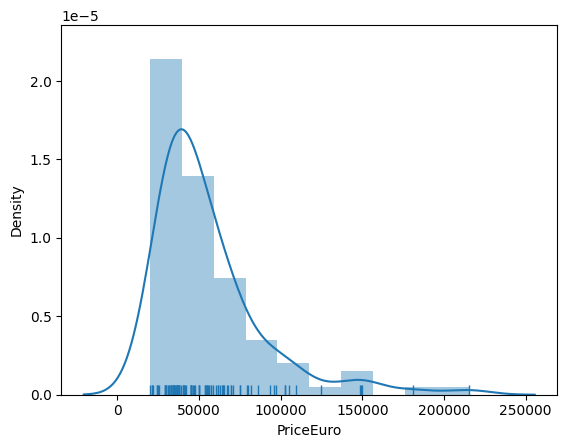

In [40]:
sns.distplot(data.PriceEuro,bins = 10,rug = True) #Creates a distribution plot for PriceEuro with rugplot

###### We can always save the new processed data using the syntax `datasetvariable.to_csv('newfile.csv')` 

In [41]:
data.to_csv('AvishakeAdhikary_processed_data.csv') #Exports the dataframe into CSV file

#### We re-read the processed data to work on the new dataset rather than working on the old one

In [43]:
data = pd.read_csv('AvishakeAdhikary_processed_data.csv') #Reads the processed CSV into a dataframe